In [21]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [22]:
# read file into dataframe
filepath = "credit_card3.csv"

df = pd.read_csv(filepath)
df.head()

,CUST_ID,BALANCE,PURCHASES_FREQUENCY,CREDIT_LIMIT,MINIMUM_PAYMENTS,Purchase Score
0,C10001,40.900749,0.166667,1000.0,139.509787,16.6667
1,C10002,3202.467416,0.000000,7000.0,1072.340217,0.0000
2,C10003,2495.148862,1.000000,7500.0,627.284787,100.0000
3,C10004,1666.670542,0.083333,7500.0,NaN,8.3333
4,C10005,817.714335,0.083333,1200.0,244.791237,8.3333


In [23]:
df=df.drop(['PURCHASES_FREQUENCY'],axis=1)

In [24]:
df.head()

,CUST_ID,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,Purchase Score
0,C10001,40.900749,1000.0,139.509787,16.6667
1,C10002,3202.467416,7000.0,1072.340217,0.0000
2,C10003,2495.148862,7500.0,627.284787,100.0000
3,C10004,1666.670542,7500.0,NaN,8.3333
4,C10005,817.714335,1200.0,244.791237,8.3333


In [5]:
df=df.drop(['CUST_ID'],axis=1)

In [25]:
df.head()

,CUST_ID,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,Purchase Score
0,C10001,40.900749,1000.0,139.509787,16.6667
1,C10002,3202.467416,7000.0,1072.340217,0.0000
2,C10003,2495.148862,7500.0,627.284787,100.0000
3,C10004,1666.670542,7500.0,NaN,8.3333
4,C10005,817.714335,1200.0,244.791237,8.3333


In [26]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [27]:
df.describe()

,BALANCE,CREDIT_LIMIT,MINIMUM_PAYMENTS,Purchase Score
count,8950.000000,8949.000000,8637.000000,8950.000000
mean,1564.474828,4494.449450,864.206542,49.035055
std,2081.531879,3638.815725,2372.446607,40.137075
min,0.000000,50.000000,0.019163,0.000000
25%,128.281915,1600.000000,169.123707,8.333300
50%,873.385231,3000.000000,312.343947,50.000000
75%,2054.140036,6500.000000,825.485459,91.666700
max,19043.138560,30000.000000,76406.207520,100.000000


In [28]:
df.isnull().sum()

CUST_ID               0
BALANCE               0
CREDIT_LIMIT          1
MINIMUM_PAYMENTS    313
Purchase Score        0
dtype: int64

In [29]:
#filling missing values with mean ones
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace=True)

In [30]:
#filling missing values with mean ones
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace=True)

In [31]:
df.isnull().sum()

CUST_ID             0
BALANCE             0
CREDIT_LIMIT        0
MINIMUM_PAYMENTS    0
Purchase Score      0
dtype: int64

In [33]:
# rename column headers
colheader = {'BALANCE': 'BALANCE',
             'MINIMUM_PAYMENTS':'PAYMENTS', 
             'CREDIT_LIMIT':'LIMIT',
             'Purchase Score':'Score'}

df.rename(columns=colheader, inplace=True)

In [34]:
df.head()

,CUST_ID,BALANCE,LIMIT,PAYMENTS,Score
0,C10001,40.900749,1000.0,139.509787,16.6667
1,C10002,3202.467416,7000.0,1072.340217,0.0000
2,C10003,2495.148862,7500.0,627.284787,100.0000
3,C10004,1666.670542,7500.0,864.206542,8.3333
4,C10005,817.714335,1200.0,244.791237,8.3333


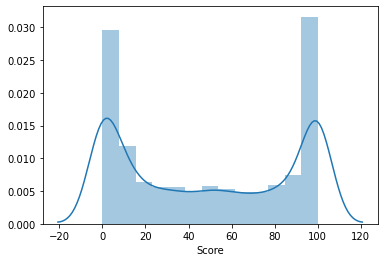

In [16]:
sns.distplot(df['Score'])

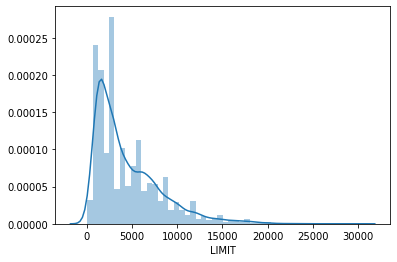

In [35]:
sns.distplot(df['LIMIT'])

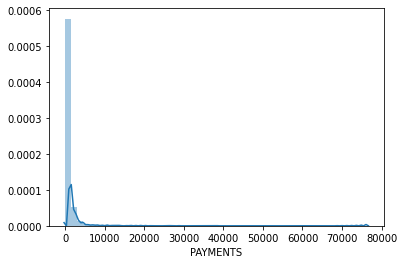

In [36]:
sns.distplot(df['PAYMENTS'])

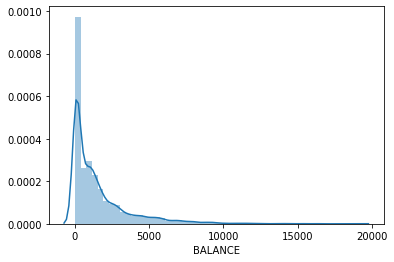

In [37]:
sns.distplot(df['BALANCE'])

In [42]:
# function to assign age groups
def BALANCE_groups(BALANCE):
    if BALANCE <= 5000:
        group = '0-5000'
    elif BALANCE <= 10000:
        group = '5001-10000'
    elif BALANCE < 15000:
        group = '10001-14999'
    elif BALANCE >= 15001:
        group = '15001+'
        
    return group

In [43]:
df['BALANCE_groups'] = df['BALANCE'].apply(BALANCE_groups)

In [55]:
def LIMIT_groups(LIMIT):
    if LIMIT < 5000:
        group = '0- $5K'
    elif LIMIT < 15000:
        group = '$5-15K'
    elif LIMIT < 20000:
        group = '$15-20K'
    elif LIMIT >= 20000:
        group = '$20K+'
        
    return group

In [56]:
df['LIMIT_groups'] = df['LIMIT'].apply(LIMIT_groups)

In [57]:
def PAYMENTS_groups(PAYMENTS):
    if PAYMENTS <= 200:
        group = '0-$200'
    elif PAYMENTS <= 500:
        group = '$201-$500'
    elif PAYMENTS < 600:
        group = '$501-$599'
    elif PAYMENTS >= 600:
        group = '$600+'
        
    return group

In [58]:
df['PAYMENTS_groups'] = df['PAYMENTS'].apply(PAYMENTS_groups)

In [59]:
df.head()

,CUST_ID,BALANCE,LIMIT,PAYMENTS,Score,BALANCE_groups,LIMIT_groups,PAYMENTS_groups
0,C10001,40.900749,1000.0,139.509787,16.6667,0-5000,0- $5K,0-$200
1,C10002,3202.467416,7000.0,1072.340217,0.0000,0-5000,$5-15K,$600+
2,C10003,2495.148862,7500.0,627.284787,100.0000,0-5000,$5-15K,$600+
3,C10004,1666.670542,7500.0,864.206542,8.3333,0-5000,$5-15K,$600+
4,C10005,817.714335,1200.0,244.791237,8.3333,0-5000,0- $5K,$201-$500


In [60]:
pd.pivot_table(data= df, index=['LIMIT'], values=['Score'])

,Score
LIMIT,
50.0,0.00000
150.0,3.63636
200.0,11.11110
300.0,29.28880
400.0,47.22220
...,...
22500.0,100.00000
23000.0,33.33335
25000.0,100.00000


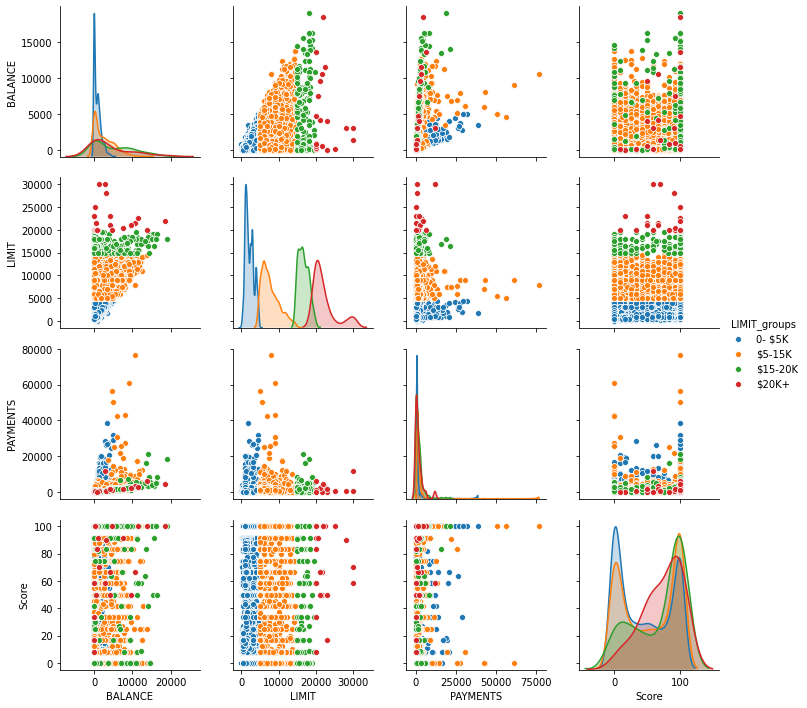

In [61]:
sns.pairplot(data=df, hue="LIMIT_groups")

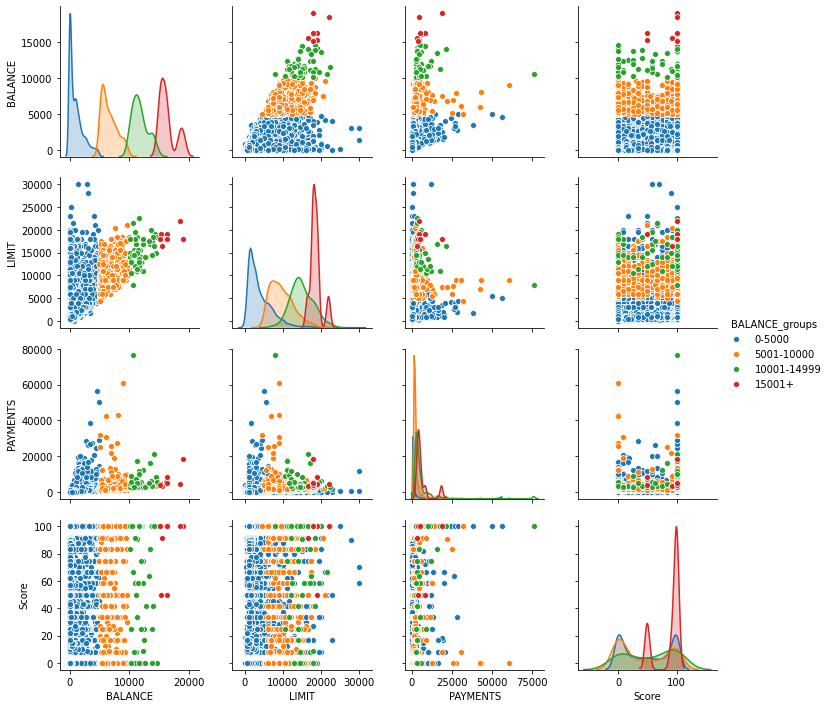

In [62]:
sns.pairplot(data=df, hue="BALANCE_groups")

In [63]:
X = df[['BALANCE', 'PAYMENTS','LIMIT', 'Score']]
X.head()

,BALANCE,PAYMENTS,LIMIT,Score
0,40.900749,139.509787,1000.0,16.6667
1,3202.467416,1072.340217,7000.0,0.0000
2,2495.148862,627.284787,7500.0,100.0000
3,1666.670542,864.206542,7500.0,8.3333
4,817.714335,244.791237,1200.0,8.3333


In [64]:
kmeans = KMeans(n_clusters=5)

In [65]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [66]:
kmeans.cluster_centers_

array([[  771.24481736,   529.98606872,  2136.1258991 ,    45.71940843],
       [ 7385.76071963,  2588.84244705, 11300.70052539,    48.11884046],
       [ 1929.23992415,   758.49241595,  6344.98419931,    53.27642627],
       [ 4489.64931388, 22662.37664707,  4715.51724138,    48.95506552],
       [ 1243.84766333,   464.87452573, 12510.546875  ,    64.12024707]])

In [67]:
df['cluster'] = kmeans.labels_
df.head()

,CUST_ID,BALANCE,LIMIT,PAYMENTS,Score,BALANCE_groups,LIMIT_groups,PAYMENTS_groups,cluster
0,C10001,40.900749,1000.0,139.509787,16.6667,0-5000,0- $5K,0-$200,0
1,C10002,3202.467416,7000.0,1072.340217,0.0000,0-5000,$5-15K,$600+,2
2,C10003,2495.148862,7500.0,627.284787,100.0000,0-5000,$5-15K,$600+,2
3,C10004,1666.670542,7500.0,864.206542,8.3333,0-5000,$5-15K,$600+,2
4,C10005,817.714335,1200.0,244.791237,8.3333,0-5000,0- $5K,$201-$500,0


C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\MR_SA\Anaconda3\lib\site-packages\statsmodels\no

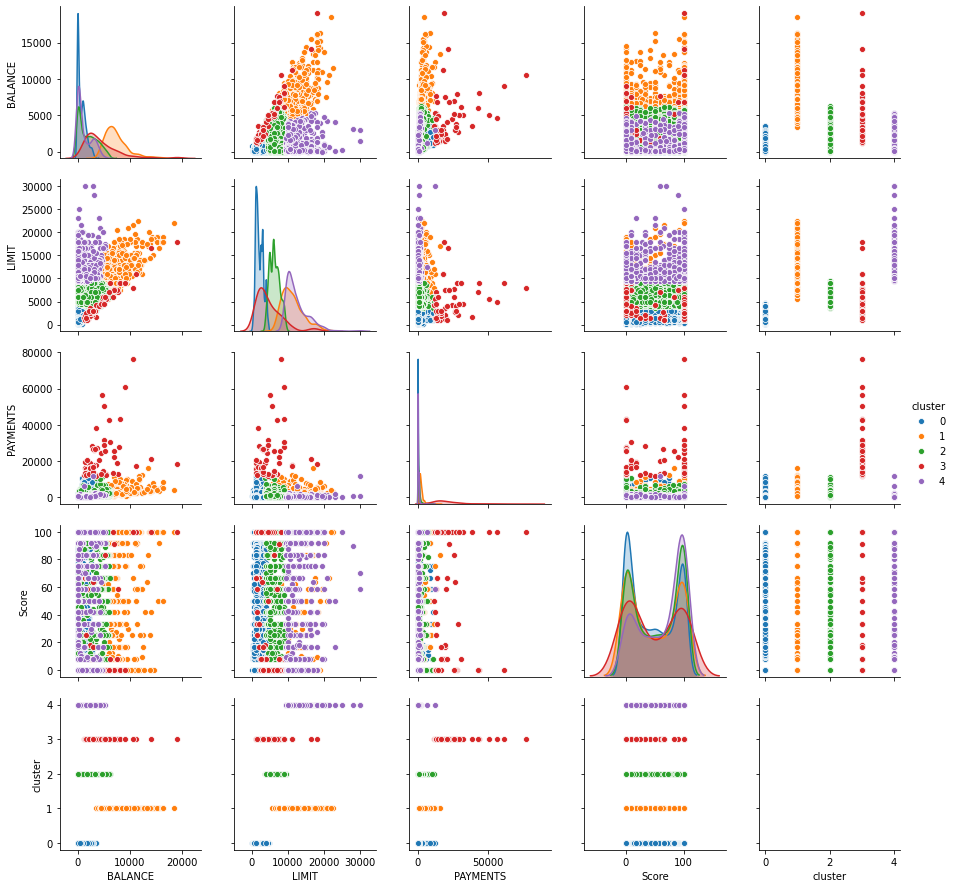

In [68]:
sns.pairplot(data=df, hue='cluster')

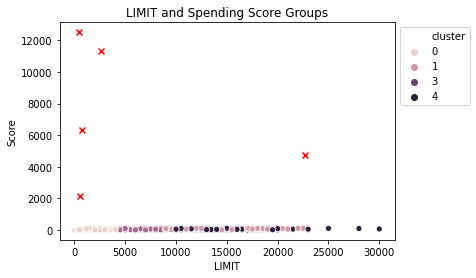

In [73]:
# compare "Income" and "Score"
sns.scatterplot(data=df, x='LIMIT', y='Score', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("LIMIT and Spending Score Groups")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

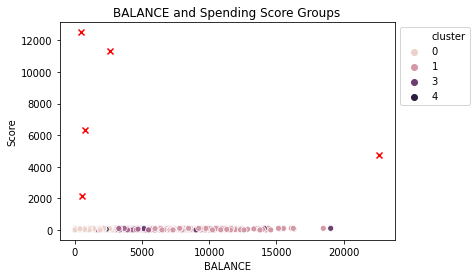

In [76]:
# compare "Income" and "Score"
sns.scatterplot(data=df, x='BALANCE', y='Score', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("BALANCE and Spending Score Groups")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

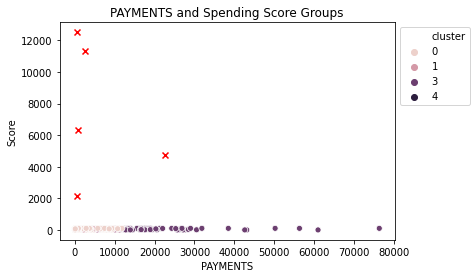

In [77]:
# compare "Income" and "Score"
sns.scatterplot(data=df, x='PAYMENTS', y='Score', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='x')

plt.title("PAYMENTS and Spending Score Groups")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)